<a target="_blank" href="https://colab.research.google.com/github/vilcagamarracf/Python_Snippets/blob/main/Grafica_Articulo_Datosmet.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Datos estacion

La presente libreta tiene por fin elaborar una gráfica con datos de la estación meteorológica ubicada en la Estación Vista Florida, INIA de Lambayeque.

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np

from glob import glob
import os

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 85 #72, 100

## Lectura de datos: Estación Meteorológica VF

In [ ]:
# Lectura de datos
pathCSV = 'Datos_est_VF_recorte.csv'
dfEstacion = pd.read_csv(pathCSV, na_values='---')

# Recorte de dataframe
dfEstacion['Fecha'] = dfEstacion.Date + " " + dfEstacion.Time
dfEstacion.Fecha = pd.to_datetime(dfEstacion.Fecha, format='%d/%m/%Y %H:%M')
dfEstacion.Date = pd.to_datetime(dfEstacion.Date, format='%d/%m/%Y')

dfEstacion = dfEstacion[['Fecha', 'Date', 'Time', 'Temp Out', 'Rain', 'Wind Speed', 'ET', 'Out Hum', 'In Hum']]
dfEstacion = dfEstacion.set_index('Fecha')
dfEstacion

C:\Users\usuario\anaconda3\envs\geomatica\lib\site-packages\IPython\core\interactiveshell.py:3257: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Temp Out,Rain,Wind Speed,ET,Out Hum,In Hum
Fecha,,,,,,,,
2024-04-24 00:00:00,2024-04-24,00:00,20.9,0.0,0.0,0.03,86.0,53.0
2024-04-24 00:05:00,2024-04-24,00:05,20.8,0.0,0.0,0.00,86.0,53.0
2024-04-24 00:10:00,2024-04-24,00:10,20.8,0.0,0.0,0.00,86.0,53.0
2024-04-24 00:15:00,2024-04-24,00:15,20.8,0.0,0.0,0.00,86.0,53.0
2024-04-24 00:20:00,2024-04-24,00:20,20.8,0.0,0.0,0.00,86.0,53.0
...,...,...,...,...,...,...,...,...
2024-08-21 12:05:00,2024-08-21,12:05,20.9,0.0,3.2,0.00,76.0,58.0
2024-08-21 12:10:00,2024-08-21,12:10,21.0,0.0,3.2,0.00,75.0,59.0
2024-08-21 12:15:00,2024-08-21,12:15,21.0,0.0,3.2,0.00,75.0,59.0


In [ ]:
dfEstacion.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30047 entries, 2024-04-24 00:00:00 to 2024-08-21 12:25:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        30047 non-null  datetime64[ns]
 1   Time        30047 non-null  object        
 2   Temp Out    30044 non-null  float64       
 3   Rain        30047 non-null  float64       
 4   Wind Speed  30047 non-null  float64       
 5   ET          30047 non-null  float64       
 6   Out Hum     30044 non-null  float64       
 7   In Hum      30046 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.1+ MB


In [ ]:
# Obtenemos valores diarios a partir de los valores 5 minutos
dfEstacion_diario = dfEstacion.resample('1D').agg({'Temp Out':'mean',
                                                   'Rain': 'sum',
                                                   'Wind Speed': 'mean',
                                                   'Out Hum': 'mean',
                                                   'In Hum': 'mean'})

# Añadir columna Doy (Day of the year)
dfEstacion_diario['Doy'] = dfEstacion_diario.index.dayofyear
dfEstacion_diario

,Temp Out,Rain,Wind Speed,Out Hum,In Hum,Doy
Fecha,,,,,,
2024-04-24,24.050000,0.0,1.583333,76.201389,53.270833,115
2024-04-25,24.743056,0.0,1.438889,73.673611,52.836806,116
2024-04-26,24.775347,0.0,1.733333,73.892361,52.854167,117
2024-04-27,24.727431,0.0,1.733333,74.381944,52.395833,118
2024-04-28,24.598611,0.0,1.672222,73.989583,51.961806,119
...,...,...,...,...,...,...
2024-08-17,17.309722,0.0,1.733333,83.107639,58.645833,230
2024-08-18,18.320833,0.0,2.005556,82.347222,59.885417,231
2024-08-19,19.089583,0.0,2.372222,80.781250,59.034722,232


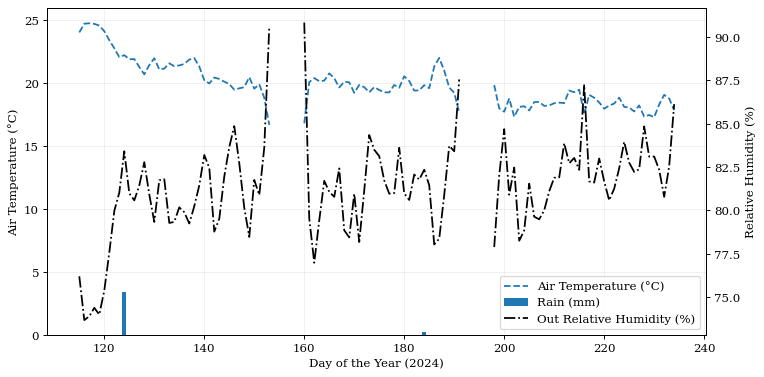

In [ ]:
# Gráfica
fig, ax = plt.subplots(figsize=(10,5))

ax.set(
    # title='Valores- Valores de ET',
    xlabel='Day of the Year (2024)',
    ylabel='Air Temperature (°C)'
)

# Temperatura
ax.plot(dfEstacion_diario.Doy, dfEstacion_diario['Temp Out'], '--', label='Air Temperature (°C)');

# Humedad Relativa (Eje Y opuesto)
ax2 = ax.twinx()
ax2.plot(dfEstacion_diario.Doy, dfEstacion_diario["Out Hum"], 'k-.', label='Out Relative Humidity (%)')
# ax2.plot(dfEstacion_diario.Doy, dfEstacion_diario["In Hum"], 'b-.', label='In Relative Humidity (%)')
ax2.set_ylabel('Relative Humidity (%)')

# Precipitación
ax.bar(dfEstacion_diario.Doy, dfEstacion_diario['Rain'], label='Rain (mm)')

# Leyenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

ax.grid(alpha=0.2);

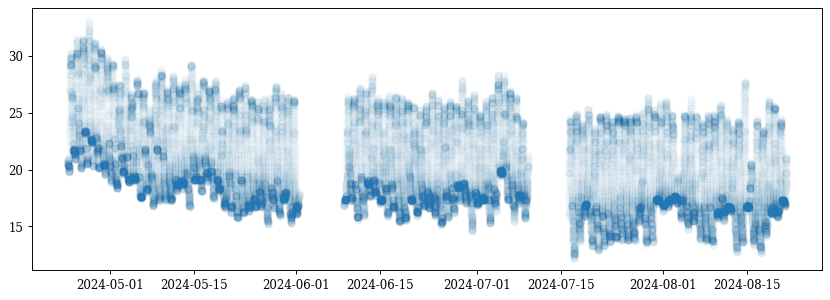

In [ ]:
# Visualización de datos faltantes
fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(dfEstacion.index, dfEstacion['Temp Out'], alpha=0.02);

Se observa que hay datos faltantes en ciertos días.

## Revisando datos faltantes en la serie temporal

Se ha descargado hojas de cálculo con datos meteorológicos del portal del SENAMHI para la Estación Vista Florida.

In [ ]:
# Desarrollamos una función que lea los archivos descargados del SENAMHI
def read_senamhi_data(df_path):
    df = pd.read_csv(df_path,
                           encoding= 'UTF-8', # 'latin-1'
                           na_values='S/D',
                           skiprows=(0,1,2,3,4,5,6,7,8,9),
                           decimal=',')

    # Asignar columna de fechas
    df.rename(columns={'AÑO / MES / DÍA': 'FECHA'}, inplace=True)
    df.FECHA = df.FECHA + " " + df.HORA
    df.FECHA = pd.to_datetime(df.FECHA, format='%Y/%m/%d %H:%M')
    df = df.set_index('FECHA')

    # Especificar tipo de datos a demás columnas
    df['TEMPERATURA (°C)'] = df['TEMPERATURA (°C)'].astype('float64')
    df['VELOCIDAD DEL VIENTO (m/s)'] = df['VELOCIDAD DEL VIENTO (m/s)'].astype('float64')
    df['PRECIPITACIÓN (mm/hora)'] = df['PRECIPITACIÓN (mm/hora)'].astype('float64')

    return df

In [ ]:
# Lectura de .csv's
mydir = os.getcwd()
file_list = glob(mydir + "/*senamhi.csv")

list_dfs = []

for csv_path in file_list:
    df_csv = read_senamhi_data(csv_path)
    list_dfs.append(df_csv)

dfEstacionVF = pd.concat(list_dfs)
dfEstacionVF

,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
FECHA,,,,,,
2024-04-01 00:00:00,00:00,23.5,0.0,76,159,1.4
2024-04-01 01:00:00,01:00,23.4,0.0,75,166,1.0
2024-04-01 02:00:00,02:00,22.8,0.0,76,258,0.5
2024-04-01 03:00:00,03:00,22.2,0.0,79,239,0.5
2024-04-01 04:00:00,04:00,21.8,0.0,82,1,NaN
...,...,...,...,...,...,...
2024-08-31 19:00:00,19:00,17.4,0.0,75,172,1.5
2024-08-31 20:00:00,20:00,16.6,0.0,80,177,1.2
2024-08-31 21:00:00,21:00,16.4,0.0,81,191,0.8


In [ ]:
dfEstacionVF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3672 entries, 2024-04-01 00:00:00 to 2024-08-31 23:00:00
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HORA                        3672 non-null   object 
 1   TEMPERATURA (°C)            3672 non-null   float64
 2   PRECIPITACIÓN (mm/hora)     3672 non-null   float64
 3   HUMEDAD (%)                 3672 non-null   int64  
 4   DIRECCION DEL VIENTO (°)    3672 non-null   int64  
 5   VELOCIDAD DEL VIENTO (m/s)  3345 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 200.8+ KB


In [ ]:
# Obtenemos valores a nivel diario mediante resampleo con estadísticas
dfEstacionVF = dfEstacionVF.resample('1D').agg({'TEMPERATURA (°C)':'mean',
                                                'PRECIPITACIÓN (mm/hora)': 'sum',
                                                'VELOCIDAD DEL VIENTO (m/s)': 'mean',
                                                'HUMEDAD (%)': 'mean'})
dfEstacionVF['Doy'] = dfEstacionVF.index.dayofyear
dfEstacionVF

,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),VELOCIDAD DEL VIENTO (m/s),HUMEDAD (%),Doy
FECHA,,,,,
2024-04-01,25.191667,0.0,1.470000,69.416667,92
2024-04-02,25.375000,0.0,0.852174,63.833333,93
2024-04-03,25.391667,0.0,1.216667,64.166667,94
2024-04-04,24.833333,0.0,1.276190,65.125000,95
2024-04-05,25.500000,1.1,1.195238,67.083333,96
...,...,...,...,...,...
2024-08-27,18.979167,0.0,0.954167,81.458333,240
2024-08-28,18.075000,0.0,1.028571,82.375000,241
2024-08-29,17.687500,0.0,1.354167,81.500000,242


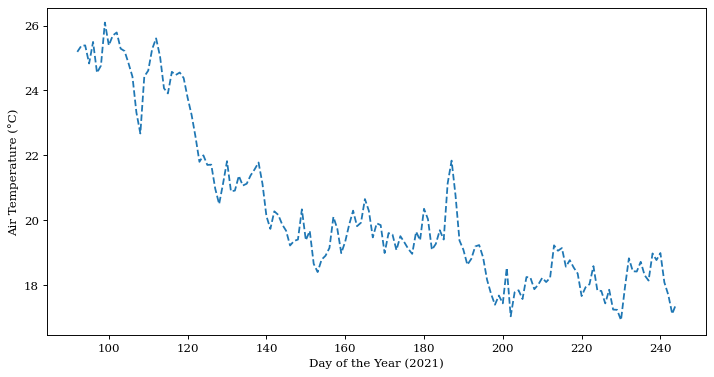

In [ ]:
# Gráfica a nivel diario
fig, ax = plt.subplots(figsize=(10,5))

ax.set(
    # title='Valores- Valores de ET',
    xlabel='Day of the Year (2024)',
    ylabel='Air Temperature (°C)'
)

# Temperatura
ax.plot(dfEstacionVF.Doy, dfEstacionVF['TEMPERATURA (°C)'], '--', label='Air Temperature (°C)');

## Uniendo ambas gráficas

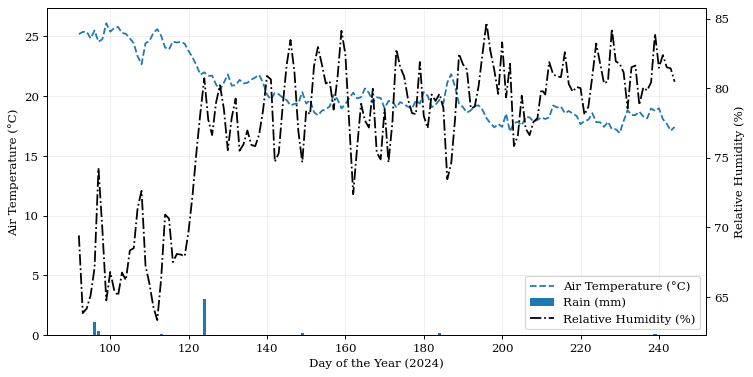

In [ ]:
# Gráfica
fig, ax = plt.subplots(figsize=(10,5))

ax.set(
    # title='Valores- Valores de ET',
    xlabel='Day of the Year (2024)',
    ylabel='Air Temperature (°C)'
)

# Temperatura
# ax.plot(dfEstacion_diario.Doy, dfEstacion_diario['Temp Out'], '--', label='Air Temperature (°C)');
ax.plot(dfEstacionVF.Doy, dfEstacionVF['TEMPERATURA (°C)'], '--', label='Air Temperature (°C)') # SENAMHI

# Humedad Relativa (Eje Y opuesto)
ax2 = ax.twinx()
# ax2.plot(dfEstacion_diario.Doy, dfEstacion_diario["Out Hum"], 'b-.', label='Relative Humidity (%)')
ax2.plot(dfEstacionVF.Doy, dfEstacionVF["HUMEDAD (%)"], 'k-.', label='Relative Humidity (%)') # SENAMHI

ax2.set_ylabel('Relative Humidity (%)')

# Precipitación
# ax.bar(dfEstacion_diario.Doy, dfEstacion_diario['Rain'], label='Rain (mm)')
ax.bar(dfEstacionVF.Doy, dfEstacionVF['PRECIPITACIÓN (mm/hora)'], label='Rain (mm)') # SENAMHI

# Leyenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

ax.grid(alpha=0.2)

# Exportar
fig.savefig('Figura-articulo.png', bbox_inches='tight', pad_inches=.1) #, dpi=400);

Gráfica lista para artículo.